In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import dates as da

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, MONDAY

In [6]:
from datetime import datetime

In [27]:
%matplotlib inline

In [8]:
amz = pd.read_csv('data/juan-amazon.csv')

In [9]:
amz['month'] = amz['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').strftime('%Y-%m'))

In [10]:
amz = amz.set_index('month');
amz = amz.sort_index();

In [11]:
rng = pd.date_range('2011/06/01', periods=87, freq='MS').strftime('%Y-%m')

In [12]:
months = pd.Series(np.zeros(rng.size), index=rng)

In [13]:
result = pd.DataFrame({'total': amz.groupby('month').sum()['amount'], 'orders': amz.groupby('month').count()['amount']}, index=amz.index.unique())

In [14]:
result['cumsum'] = result['total'].cumsum();

In [15]:
result = result.add(months, axis=0)

In [16]:
result = result.fillna(value={'orders': 0, 'total': 0})

In [25]:
result = result.fillna(method='ffill')

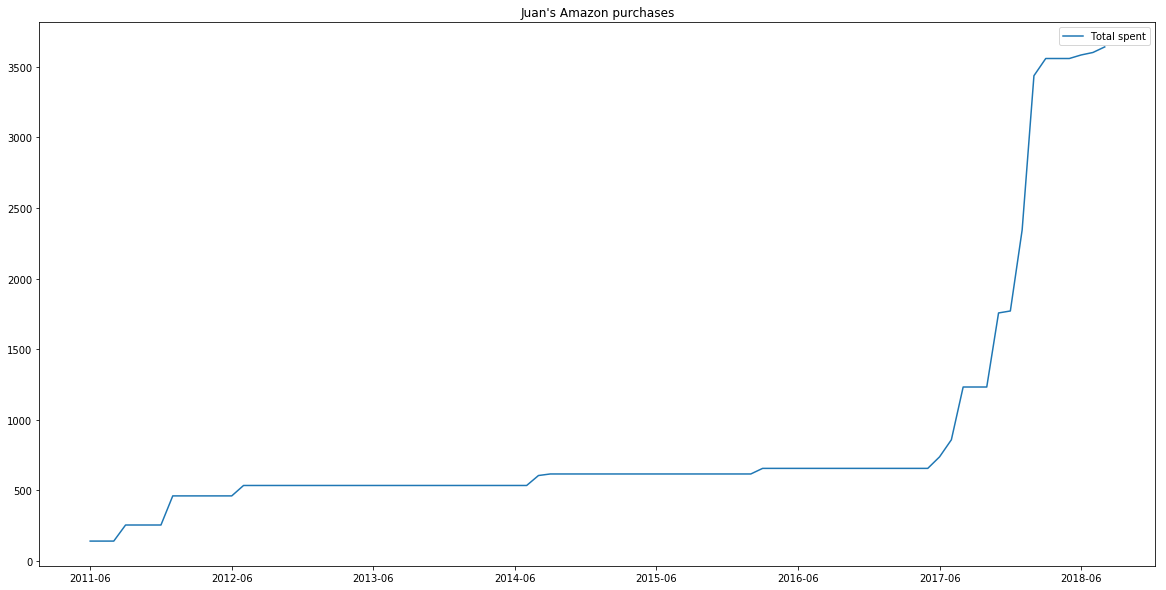

In [29]:
result.plot(xticks=range(0, 94, 12), label='Total spent', y='cumsum', legend='Total Spent', figsize=(20,10), title="Juan's Amazon purchases", use_index=True, subplots=False)